# ML Models for presentation

In [132]:
#importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
#data import
df_red = pd.read_csv('winequality-red.csv', sep= ';')
df_white = pd.read_csv('winequality-white.csv', sep= ';')

In [134]:
# creating a new column called "quality_label", we define a range and associate that range with a label
df_red ['quality_label'] = df_red['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transforming these labels into categrical data type (specific to pandas) instead of simple string
df_red ['quality_label'] = pd.Categorical(df_red['quality_label'],
categories=['low', 'medium', 'high'])

In [135]:
# creating a new column called "quality_label", we define a range and associate that range with a label
df_white ['quality_label'] = df_white['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transforming these labels into categrical data type (specific to pandas) instead of simple string
df_white['quality_label'] = pd.Categorical(df_white['quality_label'],
categories=['low', 'medium', 'high'])

In [136]:
# Addition of column of type of wine (white or red) before concatenating (Pandas)
df_white ['type'] = df_white.apply(lambda value: 'white')
df_white ['type'] = df_white['type'].fillna('white')

In [137]:
# Addition of column of type of wine (white or red) before concatenating (Pandas)
df_red['type'] = df_red.apply(lambda value: 'red')
df_red['type'] = df_red['type'].fillna('red')

In [138]:
print(df_red.shape)
print(df_white.shape)

(1599, 14)
(4898, 14)


In [139]:
df_red.drop_duplicates(inplace=True)
df_white.drop_duplicates(inplace=True)

In [140]:
print(df_red.shape)
print(df_white.shape)

(1359, 14)
(3961, 14)


**Red wine ML models**

In [141]:
#encoding 

df_red['type'].replace({'red':0, 'white':1}, inplace=True) # object encoder for wine type  (relevant when encoded)

quality_order = [['low', 'medium', 'high']]

o_enc = OrdinalEncoder(categories=quality_order) #encoding categorical features for quality using OrdinalEncoder


encoded_data = o_enc.fit_transform(df_red[['quality_label']])

df_red['quality_label_encoded']= encoded_data.astype(int)

df_red= df_red.drop('quality_label', axis=1)


In [142]:
#splitting data

X = df_red.drop(['quality_label_encoded', 'quality', 'alcohol'], axis=1) # correlated data is dropped to avoid biased data
y = df_red['quality_label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52, shuffle=True)

In [143]:
#feature scaling using normalisation

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)


In [144]:
# choosing/using random forest model
RF_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=52, max_depth=5) #it is important to assign a max depth between 3-7 to avoid under and over-fitting

In [145]:
# fitting data to the model 
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=52)

In [146]:
# output below indicate how the test data has been predicted  

RF_prediction = RF_model.predict(X_test)
print(RF_prediction)

[0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [147]:
# accuracy score to indicate the efficacy of the ML model, note there are other metrics to evaluate the ML model 

RF_accuracy = accuracy_score(y_test, RF_prediction)
print('Accuracy rate is:',RF_accuracy)
print('Error rate is:', 1 - RF_accuracy)


Accuracy rate is: 0.6727941176470589
Error rate is: 0.3272058823529411


In [148]:
# value counts here provides an easy way to review the counts/distribution of items per quality label

df_red['quality_label_encoded'].value_counts()

quality_label_encoded
1    702
0    640
2     17
Name: count, dtype: int64

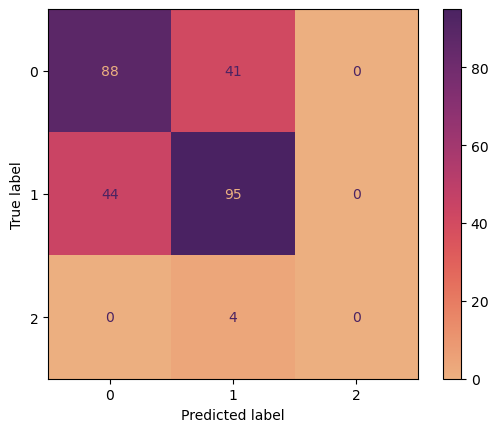

In [149]:
#confusion matrix here helps to understand behaviour of the ML Model 

CM = confusion_matrix(y_test, RF_prediction) # will display true positive, true negative, false positive and false negative


disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot(cmap='flare')


In [150]:
# cross-validation (applied to SVM model above) 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X, y, cv=4) # cv will give you the folds which are used to cross valuate, a common practice is using 5 folds. The output will be a score p/fold 
scores

array([0.65294118, 0.64117647, 0.74411765, 0.66371681])

In [151]:
#classification report provides additional score metrics that help evaluate the ML model efficacy 

print('Classification report: \n\n', classification_report(y_test, RF_prediction, target_names=["low","medium","high"]))
print("Avg accuracy from k-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # returns the mean score witi


Classification report: 

               precision    recall  f1-score   support

         low       0.67      0.68      0.67       129
      medium       0.68      0.68      0.68       139
        high       0.00      0.00      0.00         4

    accuracy                           0.67       272
   macro avg       0.45      0.46      0.45       272
weighted avg       0.66      0.67      0.67       272

Avg accuracy from k-fold CV: 0.68 (+/- 0.08)


c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**White wine ML models**

In [152]:
# encoding data 

df_white['type'].replace({'red':0, 'white':1}, inplace=True) # object encoder for type (relevant when encoded)

quality_order = [['low', 'medium', 'high']]

o_enc = OrdinalEncoder(categories=quality_order)

encoded_data = o_enc.fit_transform(df_white[['quality_label']]) # ordinal encoding used for multi-class categorical data  

df_white['quality_label_encoded']= encoded_data.astype(int)

df_white= df_white.drop('quality_label', axis=1)

prediction is: 

 [1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 

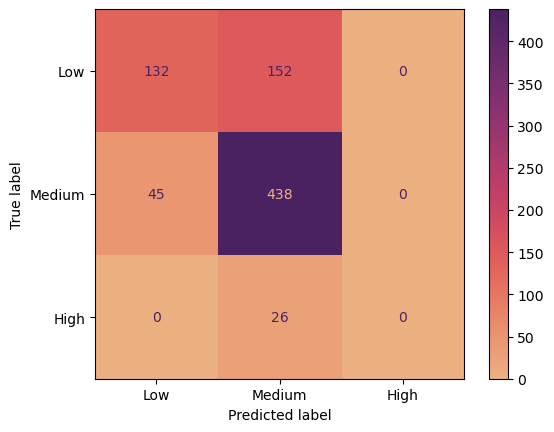

In [153]:
#splitting data

X = df_white.drop(['quality_label_encoded', 'quality', 'alcohol'], axis=1)
y = df_white['quality_label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52, shuffle=True)

#feature scaling using normalisation

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

# choosing/using random forest model
RF_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=52, max_depth=5)

# fitting data to the model 
RF_model.fit(X_train_norm, y_train)

#predicting
RF_prediction = RF_model.predict(X_test_norm)
print('prediction is: \n\n', RF_prediction)

#accuracy score
RF_accuracy = accuracy_score(y_test, RF_prediction)
print('accuracy score is: \n\n',RF_accuracy)

#confusion matrix

CM = confusion_matrix(y_test, RF_prediction) # will display true positive, true negative, false positive and false negative

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=["Low","Medium", "High"])

disp.plot(cmap='flare')


In [154]:
#classification report

print('Classification report: \n\n', classification_report(y_test, RF_prediction, target_names=["low","medium","high"]))

# cross-validation (applied to SVM model above)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X, y, cv=5)
print('Cross-validation scores are: \n\n', scores)

Classification report: 

               precision    recall  f1-score   support

         low       0.75      0.46      0.57       284
      medium       0.71      0.91      0.80       483
        high       0.00      0.00      0.00        26

    accuracy                           0.72       793
   macro avg       0.49      0.46      0.46       793
weighted avg       0.70      0.72      0.69       793



c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation scores are: 

 [0.69609079 0.69318182 0.72222222 0.7020202  0.72979798]


**Stratified k-fold cross-validation**

In [155]:
#cross_val_score identifies identifies the classes
scores = cross_val_score(RF_model, X, y)
print('Cross-validation scores are: \n', scores)

print("Avg accuracy from k-folds CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # returns the mean score witi



Cross-validation scores are: 
 [0.69609079 0.69318182 0.72222222 0.7020202  0.72979798]
Avg accuracy from k-folds CV: 0.71 (+/- 0.03)


**Function definition for SKFold CV**

In [156]:
#SKFold definition
skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Iterate over the splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score for this fold
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores):
    print(f'Fold {fold+1}: Accuracy = {accuracy}')

print('Avg score for k-folds:',  sum(accuracy_scores) / len(accuracy_scores))

c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Fold 1: Accuracy = 0.6254728877679697
Fold 2: Accuracy = 0.6098484848484849
Fold 3: Accuracy = 0.6313131313131313
Fold 4: Accuracy = 0.6401515151515151
Fold 5: Accuracy = 0.6287878787878788
Avg score for k-folds: 0.627114779573796


c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Handling Outliers** 



In [157]:
#using describe is helpful to identify 
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [158]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [159]:
#outlier deletion taking the IQR as the outlier limit across all columns (Red wine)


def remove_outliers(df, threshold=1.5):
        df_no_outliers = df.copy()
        for col in df_no_outliers.columns:
                # Calculate the IQR
                Q1 = df_no_outliers[col].quantile(0.25) # Q1 is being estimated (lower limit)
                Q3 = df_no_outliers[col].quantile(0.75) # Q3 is being estimated (upper limit)
                IQR = Q3 - Q1                           # 
                lower_bound = Q1 - threshold * IQR
                upper_bound = Q3 + threshold * IQR
                df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
        return df_no_outliers


In [160]:
# DataFrame creation with no outliers

df_red_clean = remove_outliers(df_red)

In [161]:
# new DataFrame validation by using shape as a simple resource to look at row/colum count and compare it with old DataFrame (see next cell)

df_red_clean.shape

(974, 14)

In [177]:
# previous DataFrame 

df_red.shape

(1359, 14)

In [163]:
# DataFrame creation with no outliers

df_white_clean = remove_outliers(df_white)

In [ ]:
# new DataFrame validation by using shape as a simple resource to look at row/colum count and compare it with old DataFrame (see next cell)

df_white_clean.shape

In [164]:
# previous DataFrame 

df_white.shape


(3961, 14)

Merging data frames for red and white wine

In [167]:
df_mix = pd.concat([df_red, df_white])

Plots to highlight quality distribution in the data 

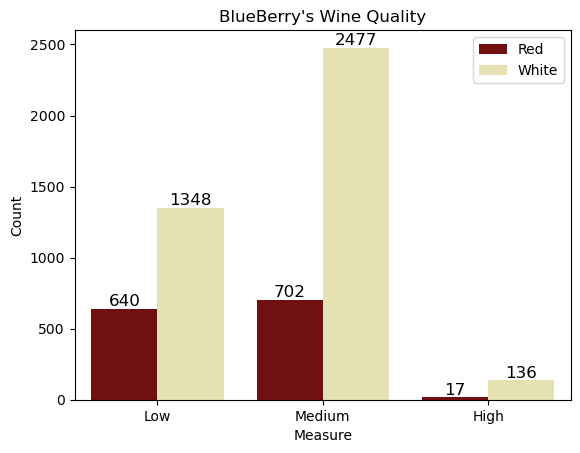

In [168]:
#plotting bar chart with distribution of wine quality p/wine type

fig, ax = plt.subplots()
sns.countplot(df_mix, x='quality_label_encoded', hue='type',palette={0:'maroon', 1:'palegoldenrod'} )

plt.title("BlueBerry's Wine Quality")
plt.xlabel('Measure')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Low','Medium','High'])
plt.legend(labels=['Red', 'White'])

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

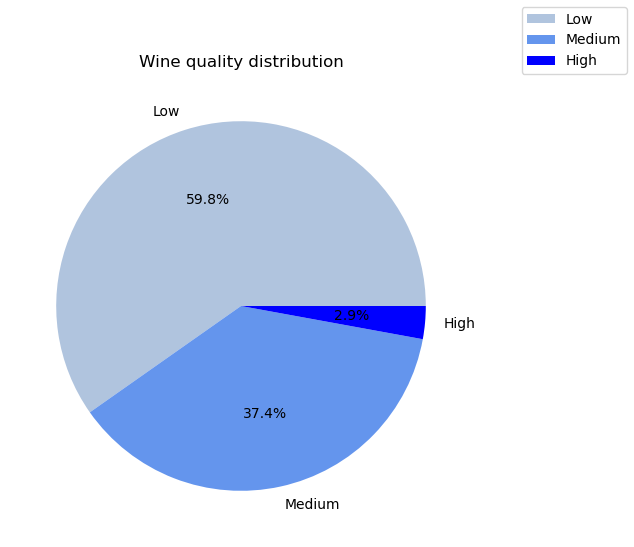

In [169]:
# Pie chart with overall (red and white) wine quality distribution (Matplotlib)
labels = ['Low', 'Medium', "High"]
data = df_mix['quality_label_encoded'].value_counts()

pie1 = plt.figure(figsize=(8,6))
plt.pie(data, labels=labels,  autopct='%1.1f%%', colors=['lightsteelblue','cornflowerblue','blue'])
pie1.legend(loc=1)
plt.title('Wine quality distribution')
plt.show()

Heatmap for correlation identification

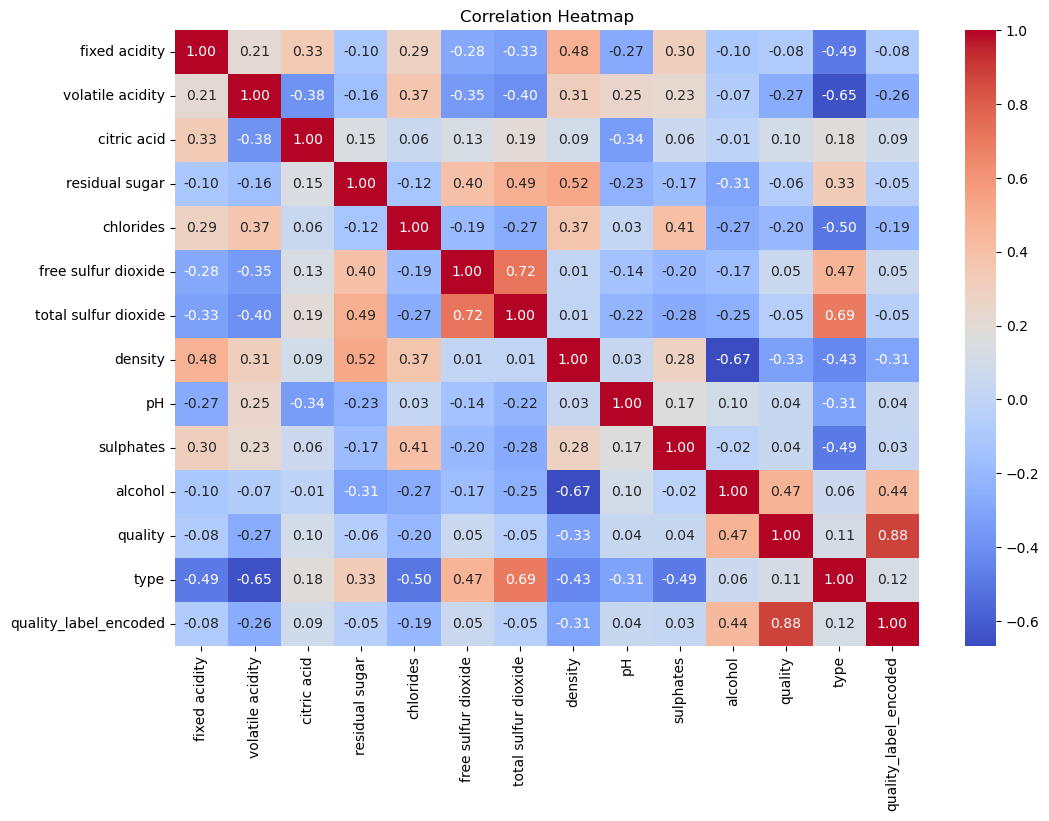

In [170]:
#heat map helps identity correlation between variables. Note that range from 1 to -1 indicates: 1 = correlation, 0 = no correlation, and -1 inverse correlation
correlation_matrix = df_mix.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [179]:
# summary of the correlation values per feature with a focus on a specific column (in this case quality) 


quality_correlation = correlation_matrix['quality'].drop('quality')  # Dropping the target variable column correlation itself
print('Features correlation summary with regard to quality: \n\n', quality_correlation.sort_values(ascending=False))


Features correlation summary with regard to quality: 

 quality_label_encoded    0.878946
alcohol                  0.469422
type                     0.114809
citric acid              0.097954
free sulfur dioxide      0.054002
sulphates                0.041884
pH                       0.039733
total sulfur dioxide    -0.050296
residual sugar          -0.056830
fixed acidity           -0.080092
chlorides               -0.202137
volatile acidity        -0.265205
density                 -0.326434
Name: quality, dtype: float64


Resampling data to avoid biased data

In [172]:
# import of modules for over and under sampling which helps for undistributed data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [173]:
# Assuming X contains your features and y contains your labels

X = df_mix.drop(['quality_label_encoded', 'quality', 'alcohol'], axis=1)
y = df_mix['quality_label_encoded']

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the sampling strategy
sampling_strategy = 'auto'  # Resampling to the size of the minority class

# Define the pipeline
pipeline = SMOTE(sampling_strategy=sampling_strategy)

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Train your model on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# If needed, you can inverse transform the predicted labels
y_pred_original = label_encoder.inverse_transform(y_pred)


              precision    recall  f1-score   support

           0       0.52      0.55      0.54       390
           1       0.67      0.26      0.37       648
           2       0.04      0.58      0.07        26

    accuracy                           0.37      1064
   macro avg       0.41      0.46      0.33      1064
weighted avg       0.60      0.37      0.42      1064



c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
# Assuming X contains your features and y contains your labels

X = df_mix.drop(['quality_label_encoded', 'alcohol'], axis=1)
y = df_mix['quality_label_encoded']

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the sampling strategy
sampling_strategy = 'auto'  # Resampling to the size of the minority class

# Define the pipeline
pipeline = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Train your model on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# If needed, you can inverse transform the predicted labels
y_pred_original = label_encoder.inverse_transform(y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      0.90      0.95       648
           2       0.29      0.96      0.44        26

    accuracy                           0.94      1064
   macro avg       0.76      0.95      0.80      1064
weighted avg       0.98      0.94      0.95      1064



c:\Users\EWF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
